<h3>Nama : Muh.Alif Alfattah Riu</h3>
<h3>Username : alif_riu</h3>
<h3>Email : alifalfattah12@gmail.com</h3>





# Submission Proyek Akhir : Klasifikasi Gambar

Membuat Program Artificial Neural Network (ANN) menggunakan Tensorflow.Program dapat mengenali bentuk tangan yang membentuk gunting, batu, dan kertas.


---






<h2>Mengunduh Dataset</h2>



In [1]:
!wget --no-check-certificate \
        https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6






<h2>Import Library</h2>





In [14]:
# Library untuk membaca file
import os

# Library untuk memproses data
import numpy as np
import pandas as pd

# Library untuk menggunakan Image Generator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Libary untuk menampilkan gambar
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline




<h2>Mempersiapkan Dataset</h2>



In [2]:
# membuat nama direktori untuk datah dan data validasi
base_dir = '/content/rockpaperscissors/rps-cv-images'

In [4]:
os.listdir(base_dir)

['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock']




<h2>Augmentasi Data Gambar</h2>



In [6]:
# membuat image data generator
# proses augmentasi gambar pada sampel data traininng
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   shear_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest',
                                   validation_split = 0.4)

# proses augmentasi gambar pada sampel data validasi
validation_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = 0.4)

# persiapan data Latih
train_generator = train_datagen.flow_from_directory(
        base_dir,
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(150, 150),
        shuffle = True,
        subset='training',
        class_mode='categorical')

# persiapan data validasi
validation_generator = validation_datagen.flow_from_directory(
        base_dir,
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(150, 150),
        subset='validation',
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


<h2>Membangun Model Convolutional Neural Network (CNN)</h2>

In [7]:
# membuat model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,895,363 (14.86 MB)

 Trainable params: 3,895,363 (14.86 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Mengimplementasikan callback dengan batas bawah akurasi 96%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get("accuracy") > 0.96) and (logs.get("val_accuracy") > 0.96):
            print("\nModel selesai dilatih karena akurasi telah lebih dari 96%!")
            self.model.stop_training = True

callbacks = myCallback()

<h2>Melatih Model Data Latih dan Data Validasi</h2>

In [9]:
# melatih model
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2,
    callbacks = [callbacks])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 - 65s - 3s/step - accuracy: 0.3837 - loss: 1.1049 - val_accuracy: 0.5125 - val_loss: 1.0020
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 - 39s - 2s/step - accuracy: 0.5739 - loss: 0.8664 - val_accuracy: 0.6625 - val_loss: 0.7575
Epoch 3/20
25/25 - 62s - 2s/step - accuracy: 0.7900 - loss: 0.4947 - val_accuracy: 0.8687 - val_loss: 0.3044
Epoch 4/20
25/25 - 38s - 2s/step - accuracy: 0.8560 - loss: 0.3486 - val_accuracy: 0.8625 - val_loss: 0.3103
Epoch 5/20
25/25 - 62s - 2s/step - accuracy: 0.8950 - loss: 0.2985 - val_accuracy: 0.9500 - val_loss: 0.1738
Epoch 6/20
25/25 - 57s - 2s/step - accuracy: 0.9086 - loss: 0.2774 - val_accuracy: 0.7973 - val_loss: 0.5062
Epoch 7/20
25/25 - 63s - 3s/step - accuracy: 0.9200 - loss: 0.2544 - val_accuracy: 0.9500 - val_loss: 0.1526
Epoch 8/20
25/25 - 36s - 1s/step - accuracy: 0.9163 - loss: 0.2359 - val_accuracy: 0.9250 - val_loss: 0.2850
Epoch 9/20
25/25 - 59s - 2s/step - accuracy: 0.9429 - loss: 0.1713 - val_accuracy: 0.9563 - val_loss: 0.1292
Epoch 10/20
25/25 - 39s - 2s/step - accuracy: 0.9485 - loss: 0.1576 - val_accuracy: 0.9563 - val_loss: 0.1190
Epoch 11/20
25/25 - 104s - 4s

<h2>Evaluasi Model</h2>

In [10]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 832ms/step - accuracy: 0.9750 - loss: 0.0913
Loss: 0.0811
Accuracy: 0.9764


In [11]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 667ms/step - accuracy: 0.9691 - loss: 0.0957
Loss: 0.0873
Accuracy: 0.9714


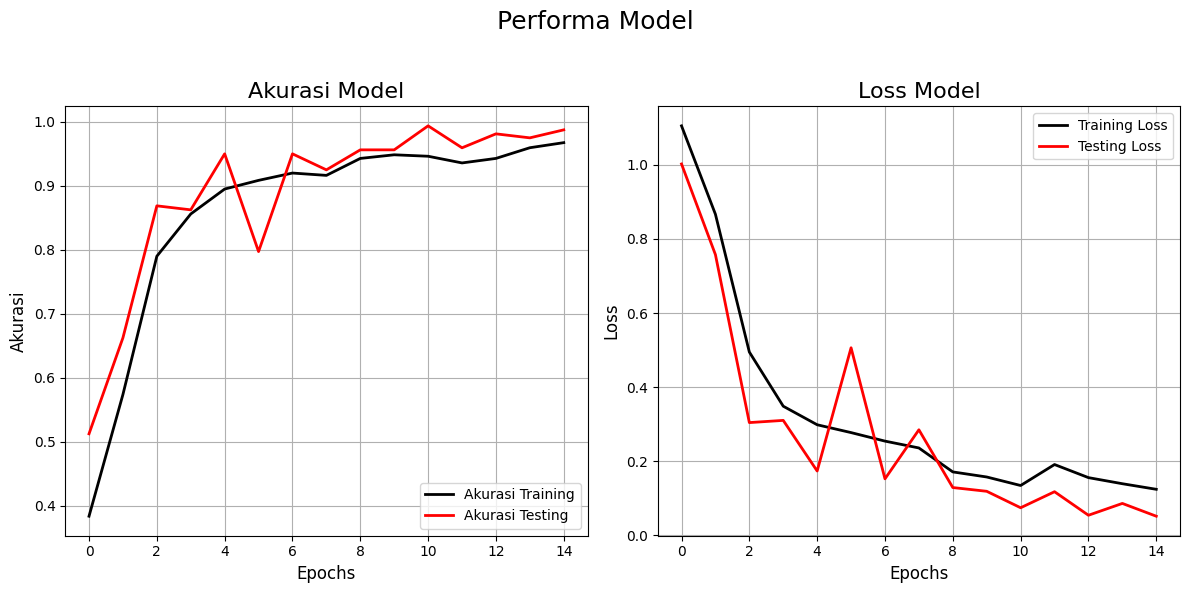

In [15]:
hasil_training = pd.DataFrame(history.history)

# Mendefinisikan variabel epoch yang merupakan jumlah epoch pada pelatihan
epoch = np.arange(len(hasil_training))

# Membentuk gambar berisi 2 sub gambar
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
fig.suptitle("Performa Model", fontsize = 18)

# Membentuk gambar yang menampilkan performa akurasi pada model
ax[0].plot(epoch, hasil_training.accuracy, label = "Akurasi Training", linewidth = 2, color = "black")
ax[0].plot(epoch, hasil_training.val_accuracy, label = "Akurasi Testing", linewidth = 2, color = "red")
ax[0].set_title("Akurasi Model", fontsize = 16)
ax[0].set_xlabel("Epochs", fontsize = 12)
ax[0].set_ylabel("Akurasi", fontsize = 12)
ax[0].legend()
ax[0].grid(True)

# Membentuk gambar yang menampilkan performa loss pada model
ax[1].plot(epoch, hasil_training.loss, label = "Training Loss", linewidth = 2, color = "black")
ax[1].plot(epoch, hasil_training.val_loss, label = "Testing Loss", linewidth = 2, color= "red")
ax[1].set_title("Loss Model", fontsize = 16)
ax[1].set_xlabel("Epochs", fontsize = 12)
ax[1].set_ylabel("Loss", fontsize = 12)
ax[1].legend()
ax[1].grid(True)

# Mengatur layout gambar
plt.tight_layout(rect = [0, 0, 1, 0.95])

# Menampilkan gambar
plt.show()

<h2>Memprediksi Model Data yang ada dengan Upload Gambar</h2>

In [16]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

Saving 0657zSfiTYzP2jrl.png to 0657zSfiTYzP2jrl.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
0657zSfiTYzP2jrl.png
scissors


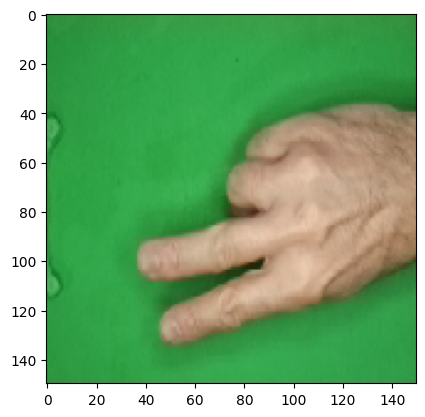

In [17]:
# tempat upload file
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn

  # memilih file gambar
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # merubah ukuran gambar dan diubah menjadi array numpy
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  outclass = np.argmax(classes)

  print(fn)
  if outclass == 0:
    print('paper')
  elif outclass == 1:
    print('rock')
  else:
    print('scissors')